# Augmentation

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from ssd.core.inference import toVisualizeRectangleimg

# Geometric distortions

## Random Expand

[[572  65 931 345]]
(572, 65) (931, 345)


<IPython.core.display.Javascript object>


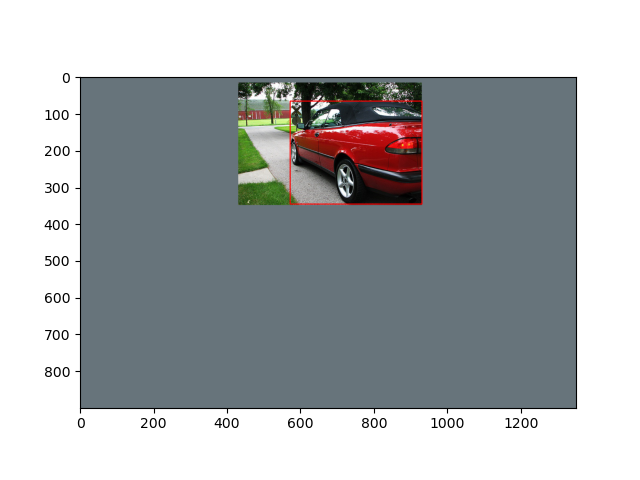

[[219 615 335 782]]
(219, 615) (335, 782)


<IPython.core.display.Javascript object>


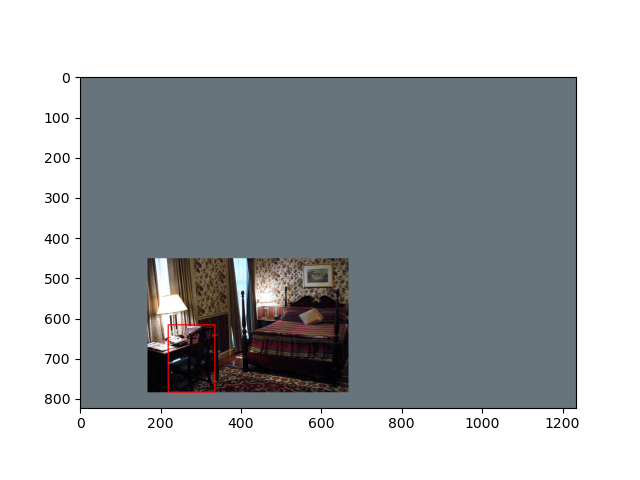

[[ 82  95 242 237]]
(82, 95) (242, 237)


<IPython.core.display.Javascript object>


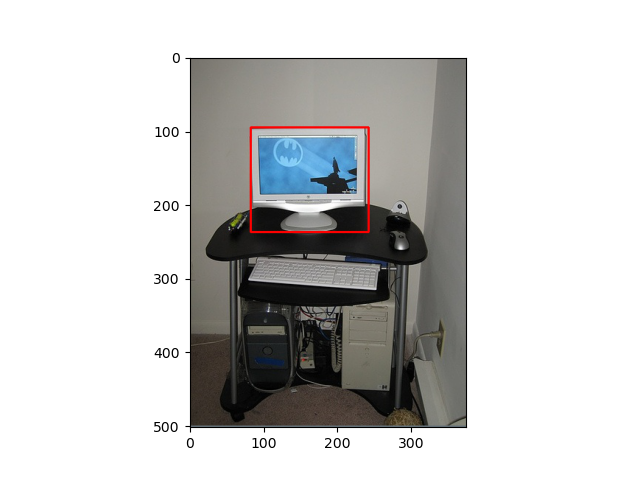

[[ 82 113 569 297]]
(82, 113) (569, 297)


<IPython.core.display.Javascript object>


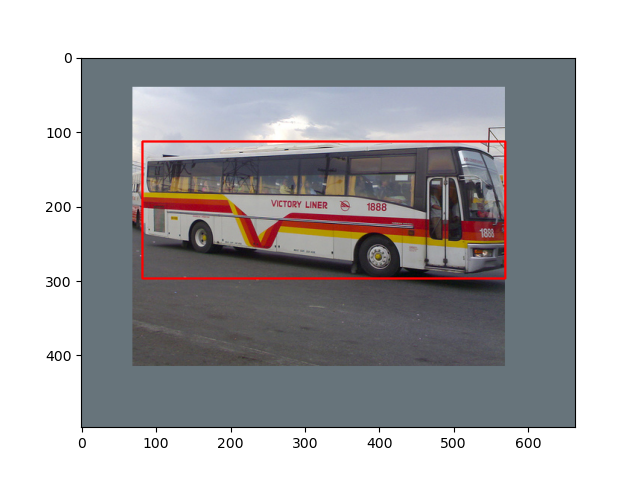

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.ToTensor()]
)

target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[210   0 489 196]]
(210, 0) (489, 196)


<IPython.core.display.Javascript object>


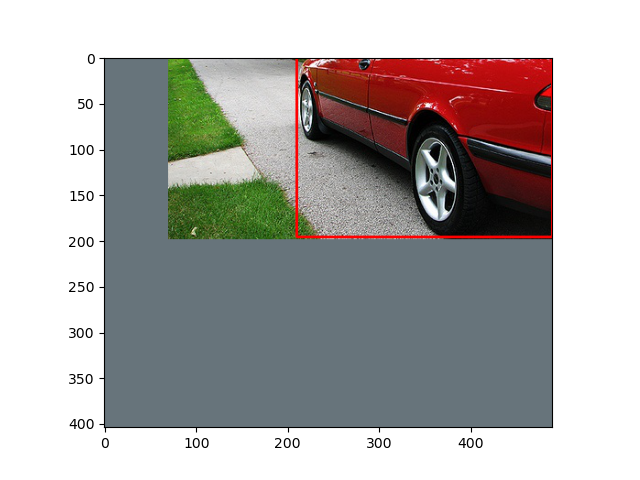

[[  5 108 120 218]]
(5, 108) (120, 218)


<IPython.core.display.Javascript object>


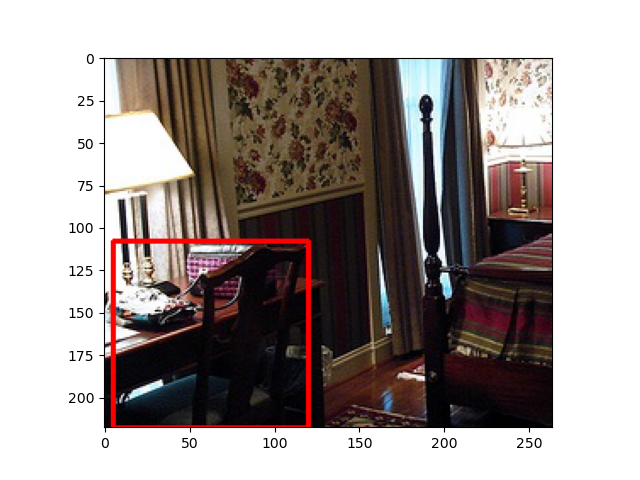

[[396  94 556 236]]
(396, 94) (556, 236)


<IPython.core.display.Javascript object>


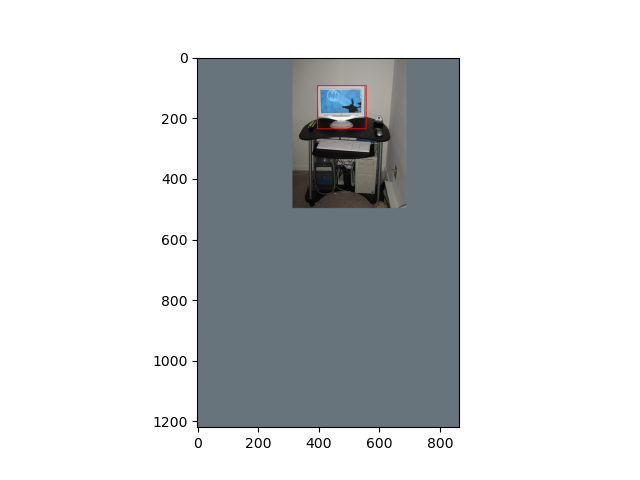

[[  0   8 319 192]]
(0, 8) (319, 192)


<IPython.core.display.Javascript object>


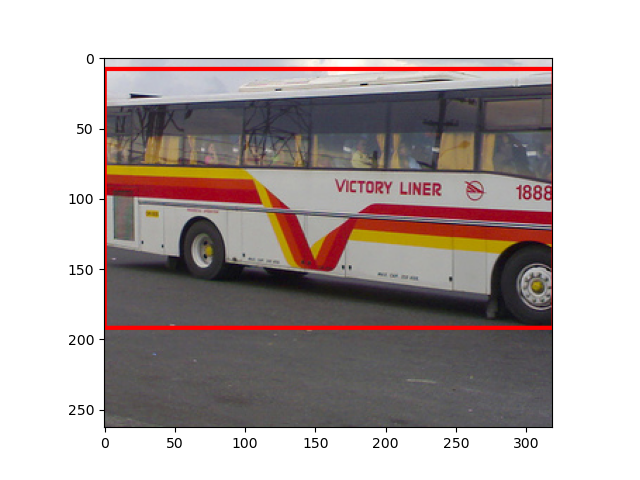

In [8]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0  50 359 330]]
(0, 50) (359, 330)


<IPython.core.display.Javascript object>


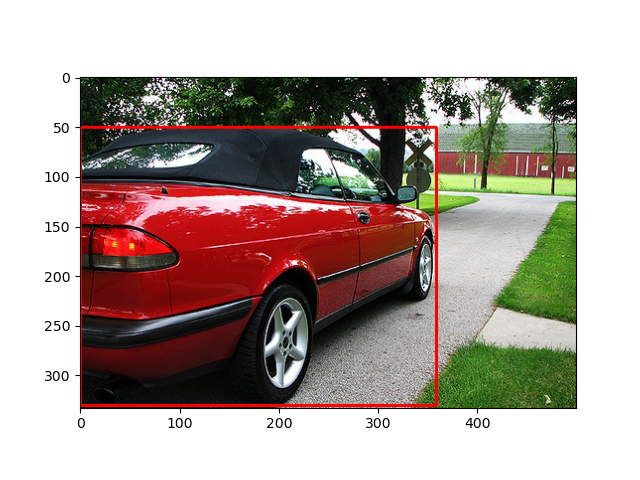

[[333 166 448 332]]
(333, 166) (448, 332)


<IPython.core.display.Javascript object>


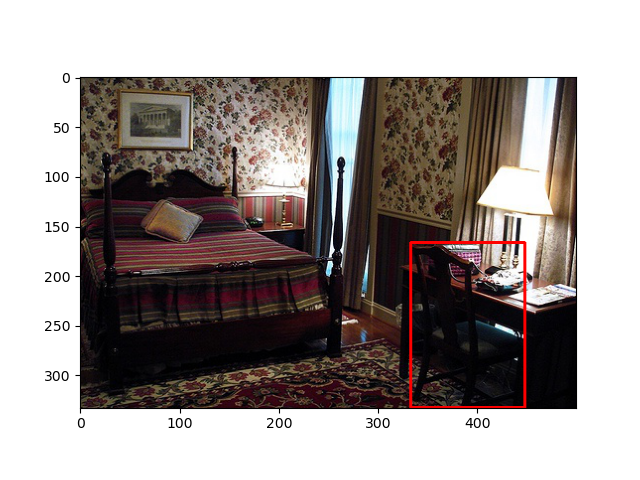

[[132  95 293 238]]
(132, 95) (293, 238)


<IPython.core.display.Javascript object>


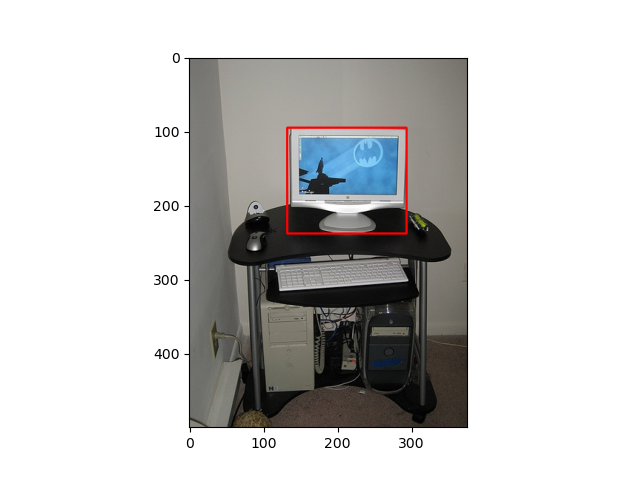

[[  0  73 486 257]]
(0, 73) (486, 257)


<IPython.core.display.Javascript object>


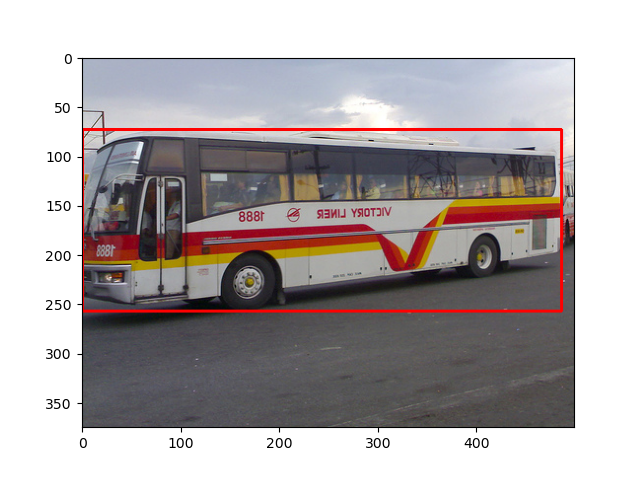

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)